In [1]:
import pandas as pd
import numpy as np
from modsim import *
import matplotlib.pyplot as plt


# data = pd.read_csv('ecg_data1.csv', header = 0)

data = pd.read_csv('data/ecg_data.csv', index_col='time');
print (data.head())
# print(data.CH2[:50])

           CH1       CH2       CH3       CH4  CH5  CH6  CH7  CH8  Column1
time                                                                     
1     0.023452 -0.003159 -0.011702  0.400032  0.4  0.4  0.4  0.4      NaN
2     0.023450 -0.003158 -0.011715  0.400031  0.4  0.4  0.4  0.4      NaN
3     0.023452 -0.003143 -0.011648  0.400027  0.4  0.4  0.4  0.4      NaN
4     0.023458 -0.003119 -0.011527  0.400021  0.4  0.4  0.4  0.4      NaN
5     0.023469 -0.003096 -0.011398  0.400014  0.4  0.4  0.4  0.4      NaN


In [4]:
table=data

In [22]:
print(data.columns[0:4])


Index(['CH1', 'CH2', 'CH3', 'CH4'], dtype='object')


In [2]:
# path_file="/data/ecg_data1.csv"
# d=pd.read_csv(path_file)
# print(d.head())

print(data.CH1[:10])

time
1     0.023452
2     0.023450
3     0.023452
4     0.023458
5     0.023469
6     0.023483
7     0.023499
8     0.023512
9     0.023521
10    0.023524
Name: CH1, dtype: float64


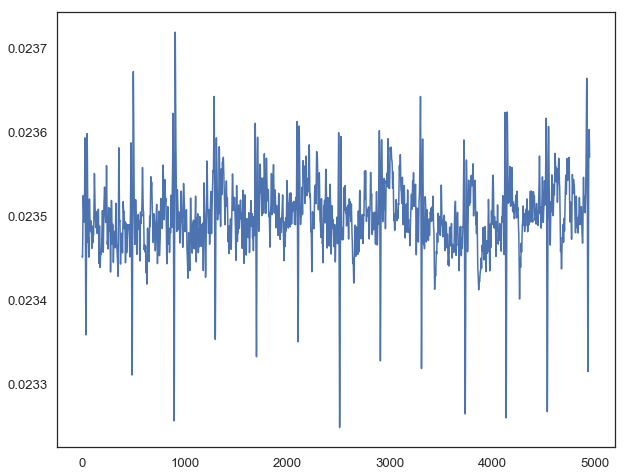

In [3]:
plt.figure(figsize=(10,8))
plt.plot(data.CH1)


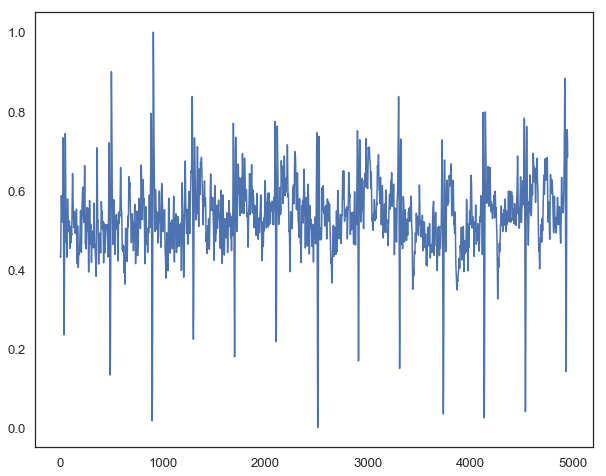

In [9]:
data_max=max(data.CH1)
data_min=min(data.CH1)
table=(data.CH1-data_min)/(data_max-data_min)
plt.figure(figsize=(10,8))
plt.plot(table)

In [100]:
# t= len(data.CH1)
# for i in range(t):
#     a=max(data.CH1)
# #     b=min(data.CH1)
# #     data.CH1[i]=(data.CH1[i]-b)/(b-a)
# print(data.CH1[:100])

TypeError: 'int' object is not callable

In [17]:
len=int(len(table)/128)*128


time
1   -1.000266
2   -1.000268
3   -1.000266
4   -1.000260
5   -1.000249
Name: CH1, dtype: float64 4950


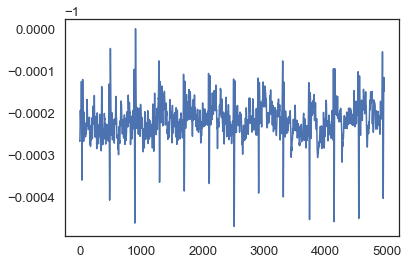

In [111]:
a=max(data.CH1)
b=min(data.CH1)
table=data.CH1-b/b-a
print(table.head(),len(table))
plt.plot(table)

In [90]:
data.CH1[1]

0.023451691

In [21]:
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 15000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000


h=[2,    10,    14,     7,    -7,   -17,   -13 ,    3,
    19,    21,     4,   -21,   -32,   -16,    18 ,   43,
    34,    -8,   -51,   -56,   -11,    53,    81 ,   41,
    -44,  -104,   -81,    19,   119,   129,    24 , -119,
    -178,   -88,    95,   222,   171,   -41,  -248 , -266,
    -50,   244,   366,   181,  -195,  -457,  -353 ,   85,
    522,   568,   109,  -540,  -831,  -424,   474 , 1163,
    953,  -245, -1661, -2042,  -463,  2940,  6859 , 9469,
    9969,  6859,  2940,  -463, -2042, -1661,  -245 ,  953,
    1163,   474,  -424,  -831,  -540,   109,   568 ,  522,
    85,  -353,  -457,  -195,   181,   366,   244 ,  -50,
    -266,  -248,   -41,   171,   222,    95,   -88 , -178,
    -119,    24,   129,   119,    19,   -81,  -104 ,  -44,
    41,    81,    53,   -11,   -56,   -51,    -8 ,   34,
    43,    18,   -16,   -32,   -21,     4,    21 ,   19,
    3,   -13,   -17,    -7,     7,    14,    10 ,   -2];
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
 
combined_signal = sine_wave[:4900] + sine_noise[:4900]

length_h =len(h)

def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    for i in range (sampling_rate):
        acc=0
        for j in range(128):                   
            acc+=h[j]*signal[i-j]
        output[i]= acc
    return output
signal_after_filter=fir_low(combined_signal,500)

plt.plot(signal_after_filter[:500])
# print(len(sine_wave),len(sine_noise))
# print(len(combined_signal))

TypeError: 'int' object is not callable